In [23]:
#%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import copy

In [24]:
def sense(x,y): #sensor function
    z = np.array([x,y])
    return z

In [25]:
def control(x,y):
    K = .5
    x_speed = -K*(x - 2)
    y_speed = -K*(y - 10)
    return np.array([x_speed, y_speed]) #create a 2D array for the x and y coordinates

In [26]:
def simulate(Δt, x, y, u1, u2):
    x += Δt * u1 # Euler integration
    y += Δt * u2
    return np.array([x,y])

In [39]:
tf = 30. # end time
Δt = 1.    # Time step
time = np.linspace(0., tf, int(tf / Δt) + 1) 
x = 4. # some distance
y = 5.
coor_log = [copy.copy(np.array([x,y]))] # shallow copy of array
error_log = [copy.copy(np.array([x-2,y-10]))]
for t in time:
    coor = sense(x,y)
    u = control(coor[0],coor[1])
    sim = simulate(Δt, x, y, u[0], u[1])
    x, y = sim[0], sim[1]
    error_log.append(copy.copy(np.array([x-2,y-10])))
    coor_log.append(copy.copy(sim))

coor_log = np.array(coor_log)
error_log = np.array(error_log)

In [40]:
error_log.shape


(32, 2)

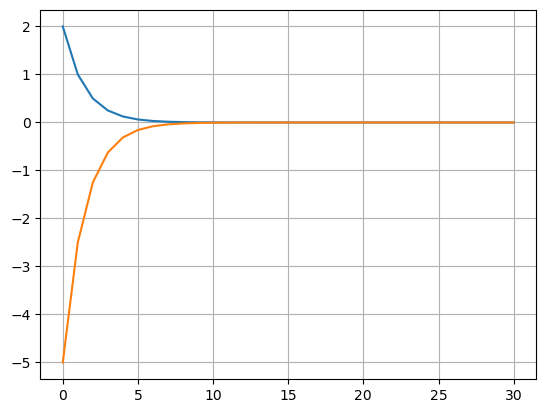

In [41]:
plt.grid() # positioning of where plot is (there is only one so it doesn't matter)
plt.plot(time, error_log[:-1,0]) # plot the graph?
plt.plot(time, error_log[:-1,1])

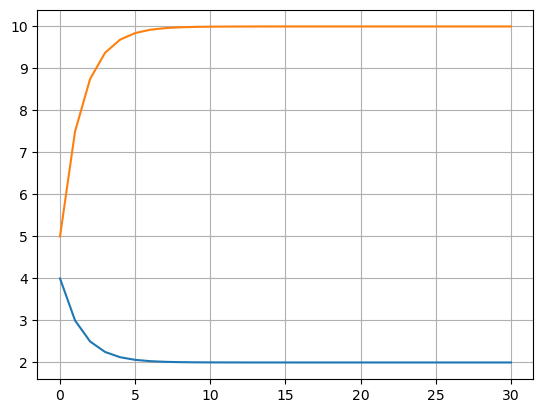

In [34]:
plt.grid() # positioning of where plot is (there is only one so it doesn't matter)
plt.plot(time, coor_log[:-1,0]) # plot the graph?
plt.plot(time, coor_log[:-1,1])